## Unsupervised Learning on Country Data - Modeling

### Import the necessary libraries

In [51]:
# necessary libraries
import warnings
warnings.filterwarnings('ignore')
import re
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans
from sklearn.metrics import  silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import hypertools as hyp
from collections import Counter

'''Set plotting parameters'''
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

### Read data

In [5]:
file_path = str(Path().parent.absolute().parent.absolute()) + '\\01. Data\\Cleaned_Data.csv'
df_original = pd.read_csv(file_path)

In [6]:
df_original = df_original.drop('Unnamed: 0', axis=1)
df_original

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [7]:
countries = df_original['country']
countries

0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
162                Vanuatu
163              Venezuela
164                Vietnam
165                  Yemen
166                 Zambia
Name: country, Length: 167, dtype: object

In [8]:
df = df_original.drop('country',axis=1)
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


### Preprocess for modeling

#### Scaling

In [12]:
ss = StandardScaler()

'''fit scaler on numeric features'''
ss.fit(df)

'''scale numeric features now'''
X = ss.transform(df)

### Models

#### K-Means

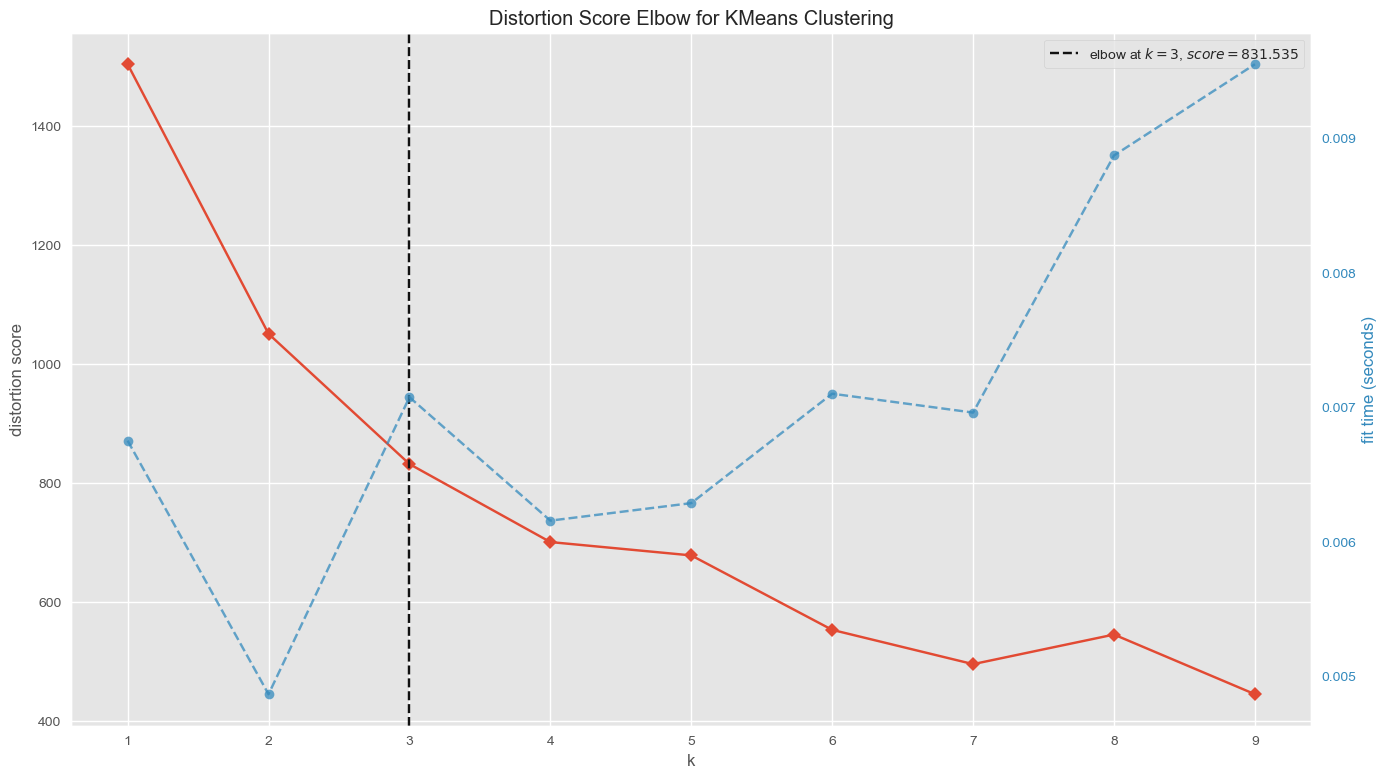

In [24]:
# Instantiate the clustering model and visualizer
model = KMeans(n_init='auto')
visualizer = KElbowVisualizer(model, k=(1,10), locate_elbow=True)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.poof()        # Draw/show/poof the data
plt.show()

----------------------------------------------------------------------
For n_clusters = 2 The average silhouette_score is : 0.28735668921406704


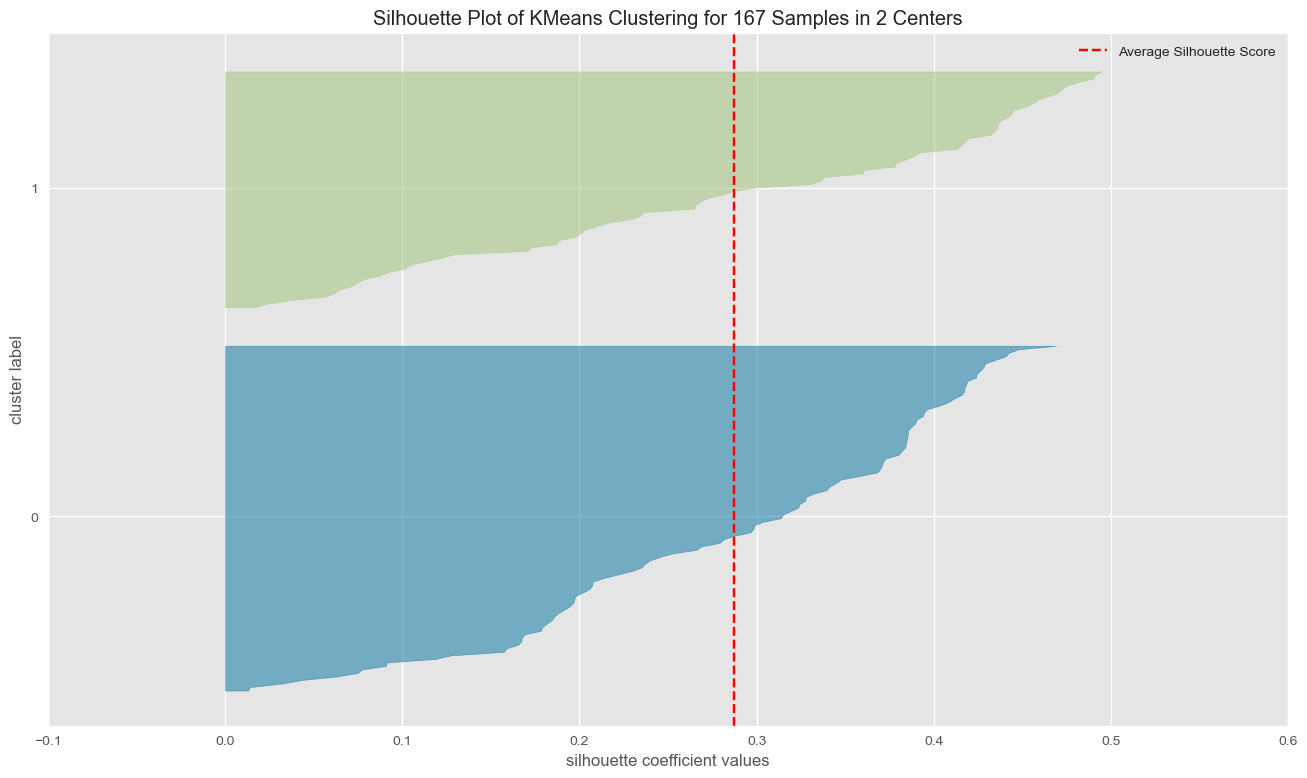

----------------------------------------------------------------------
For n_clusters = 3 The average silhouette_score is : 0.28329575683463126


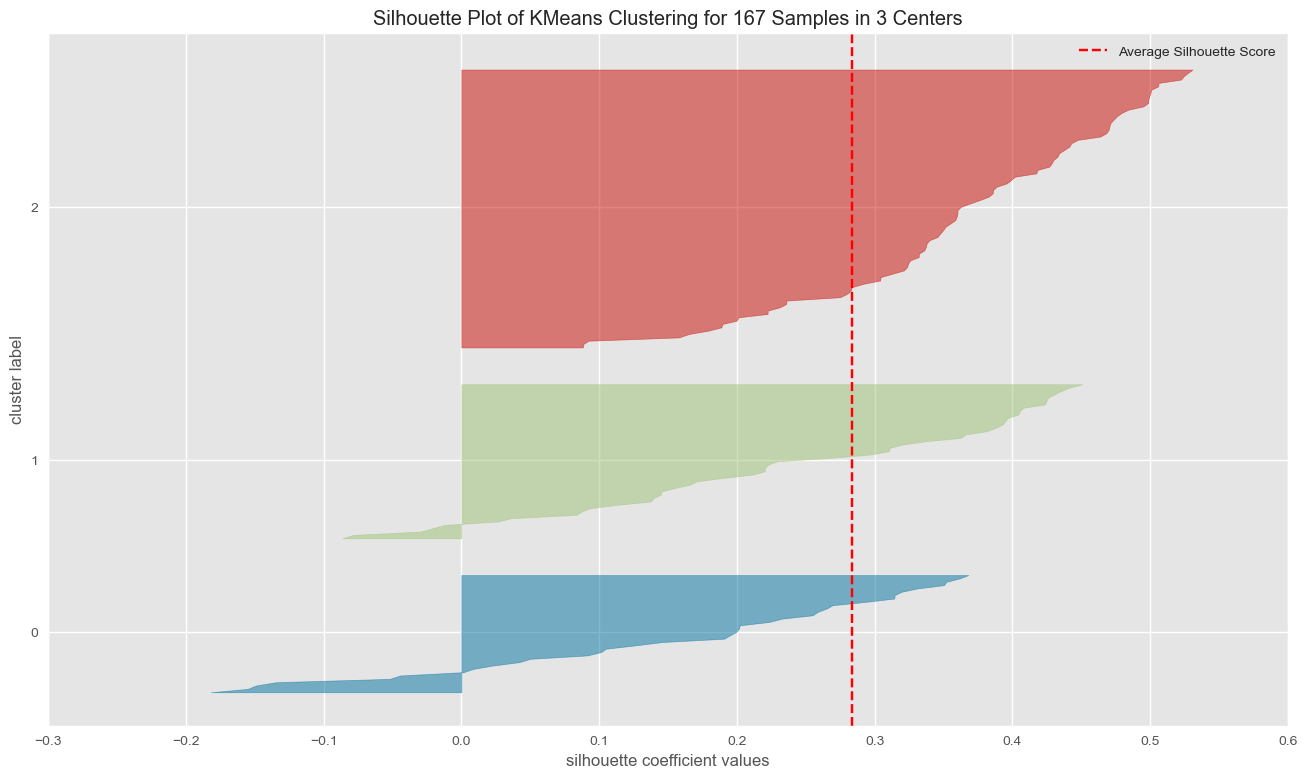

----------------------------------------------------------------------
For n_clusters = 4 The average silhouette_score is : 0.301375962376881


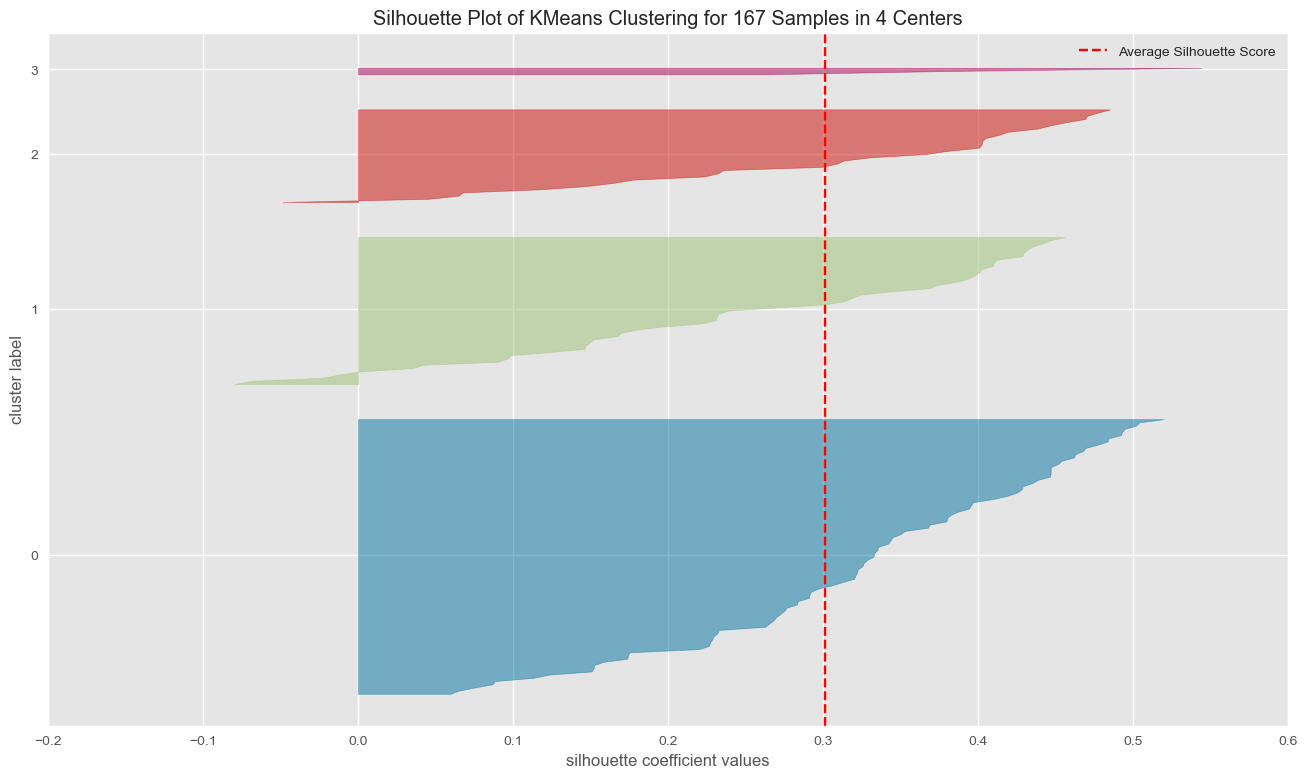

----------------------------------------------------------------------
For n_clusters = 5 The average silhouette_score is : 0.2992594995920442


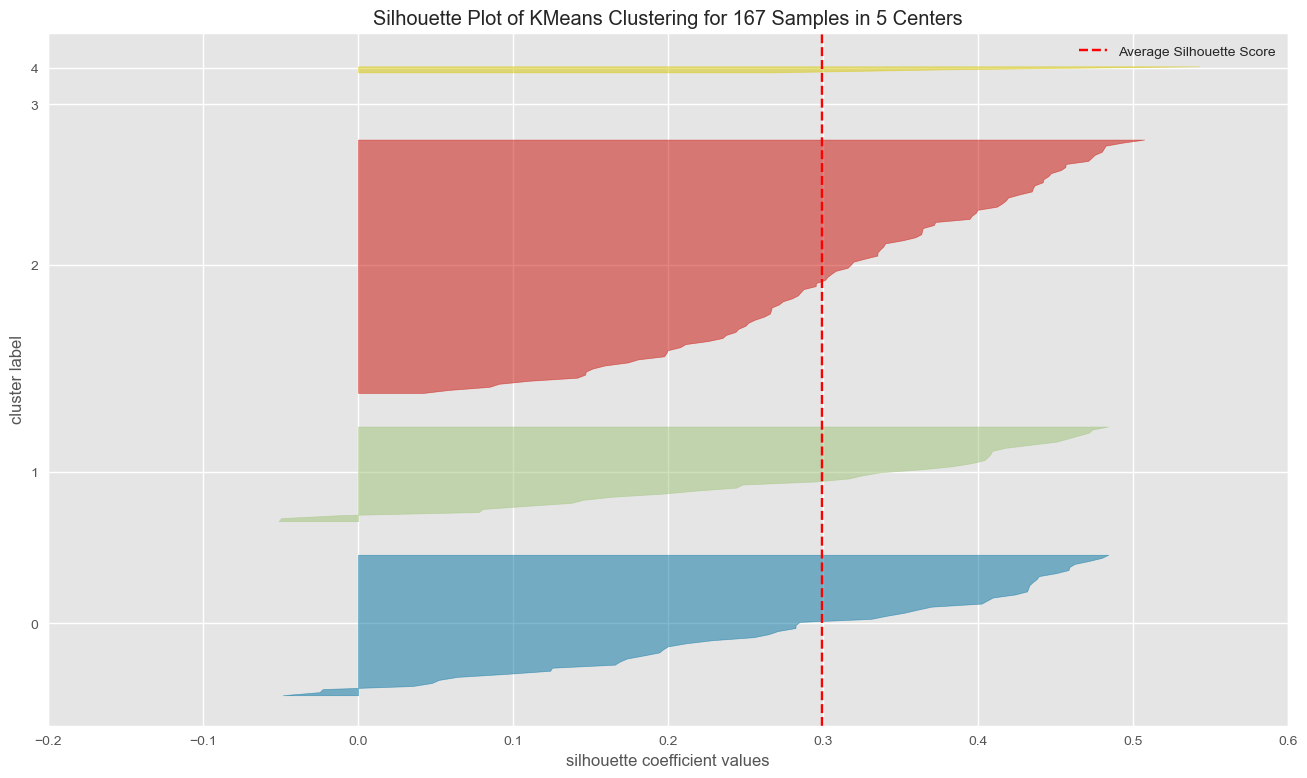

----------------------------------------------------------------------
For n_clusters = 6 The average silhouette_score is : 0.2350698927516289


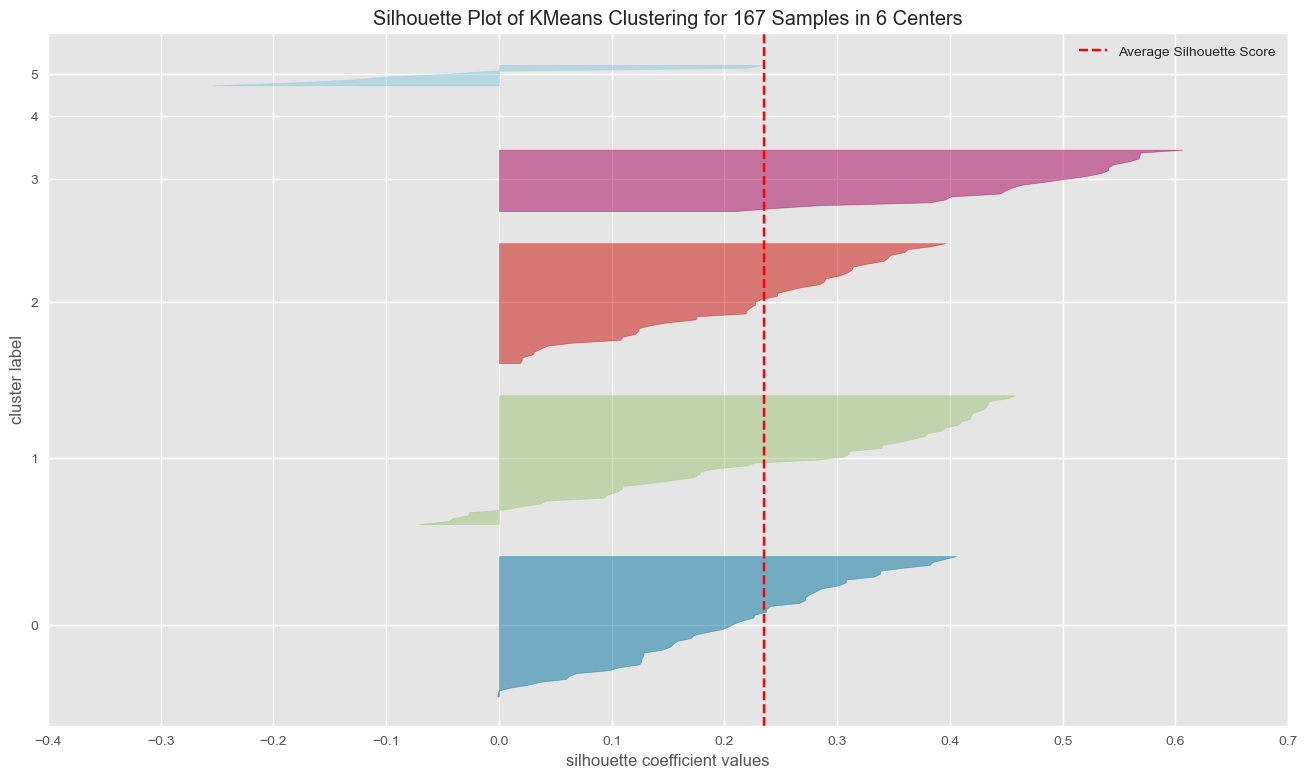

----------------------------------------------------------------------
For n_clusters = 7 The average silhouette_score is : 0.24905003461730515


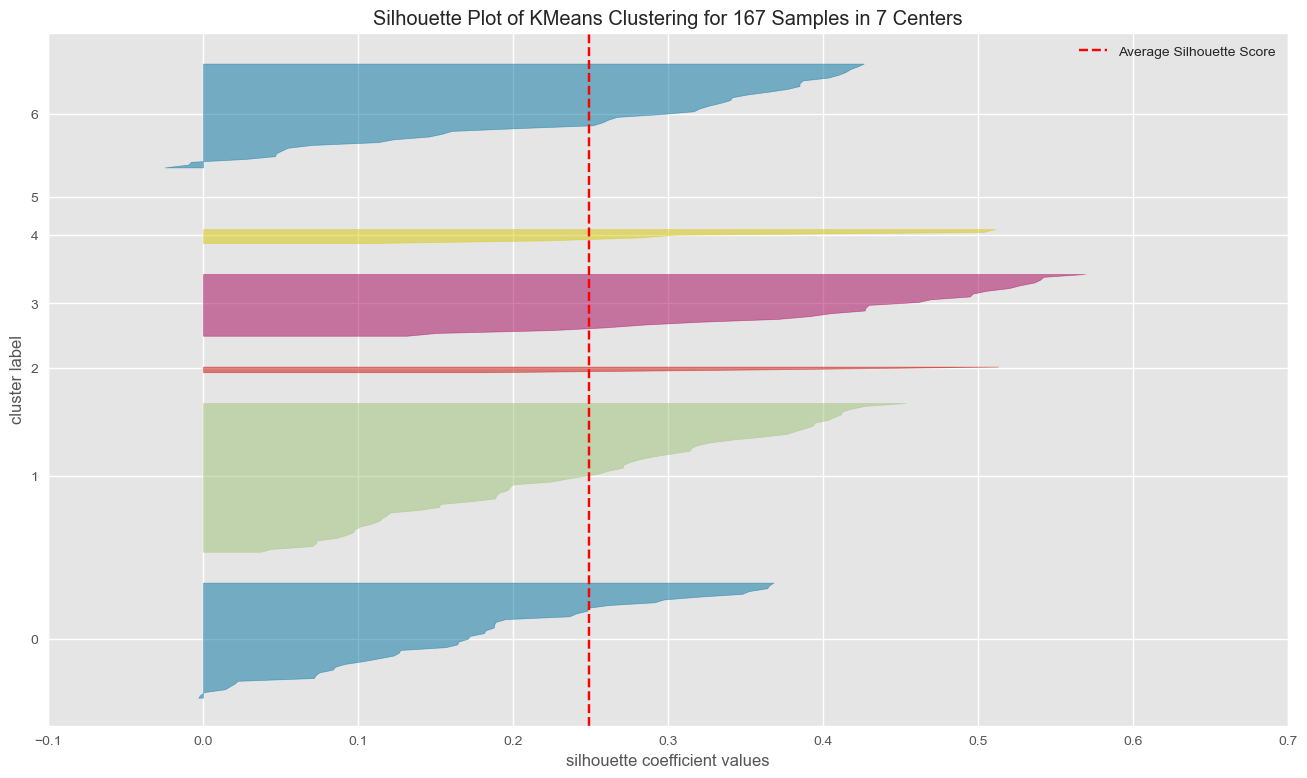

In [26]:
search_name = 'kmeans'

n_clusters = np.arange(2,8,1).tolist()

for n_clusters in n_clusters:
    
    print('-'*70)
    
    model = KMeans()

    param_dict = {'n_clusters': n_clusters,
                  'n_init': 10,
                  'random_state':42,
                 'algorithm':'auto'
                 }

    model.set_params(**param_dict)
    labels = model.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

    visualizer.fit(X)        # Fit the data to the visualizer
    visualizer.poof()

##### Based on the above we determine that the best approach is to run K-means, with k = 3

In [28]:
'''use the best K combining everything'''
model = KMeans(
        n_clusters=3,
        init='k-means++',
#         n_jobs=-1,
        random_state=1)

model = model.fit(X)

y_kmeans = model.predict(X)

In [29]:
'''create df out of y'''
y_kmeans_df = pd.DataFrame(y_kmeans) # y= predictions with K-means (3 clusters)
'''rename y col'''
y_kmeans_df.rename(columns = {0:"Cluster"}, inplace=True)

In [33]:
kmeans_df = pd.concat([df_original, y_kmeans_df], axis=1)
kmeans_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


In [36]:
kmeans_df['Cluster'].unique()

array([0, 1, 2])

In [87]:
kmeans_df['Cluster'].value_counts()

2st Priority of Funding    84
1st Priority of Funding    47
No need for Funding        36
Name: Cluster, dtype: int64

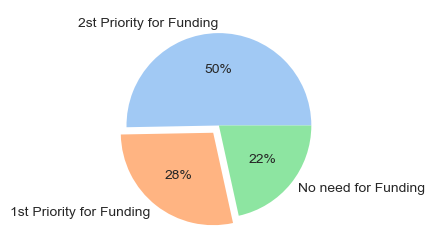

In [91]:

# declaring data
data = kmeans_df['Cluster'].value_counts()
keys = ['2st Priority for Funding','1st Priority for Funding', 'No need for Funding']
  
# declaring exploding pie
explode = [0, 0.1, 0]
# define Seaborn color palette to use
palette_color = sns.color_palette('pastel')
plt.figure(figsize = (7,3))  
# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color,
        explode=explode, autopct='%.0f%%')
  
# displaying chart
plt.show()

In [40]:
list(kmeans_ppa_df_hist.columns[1:-1])

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

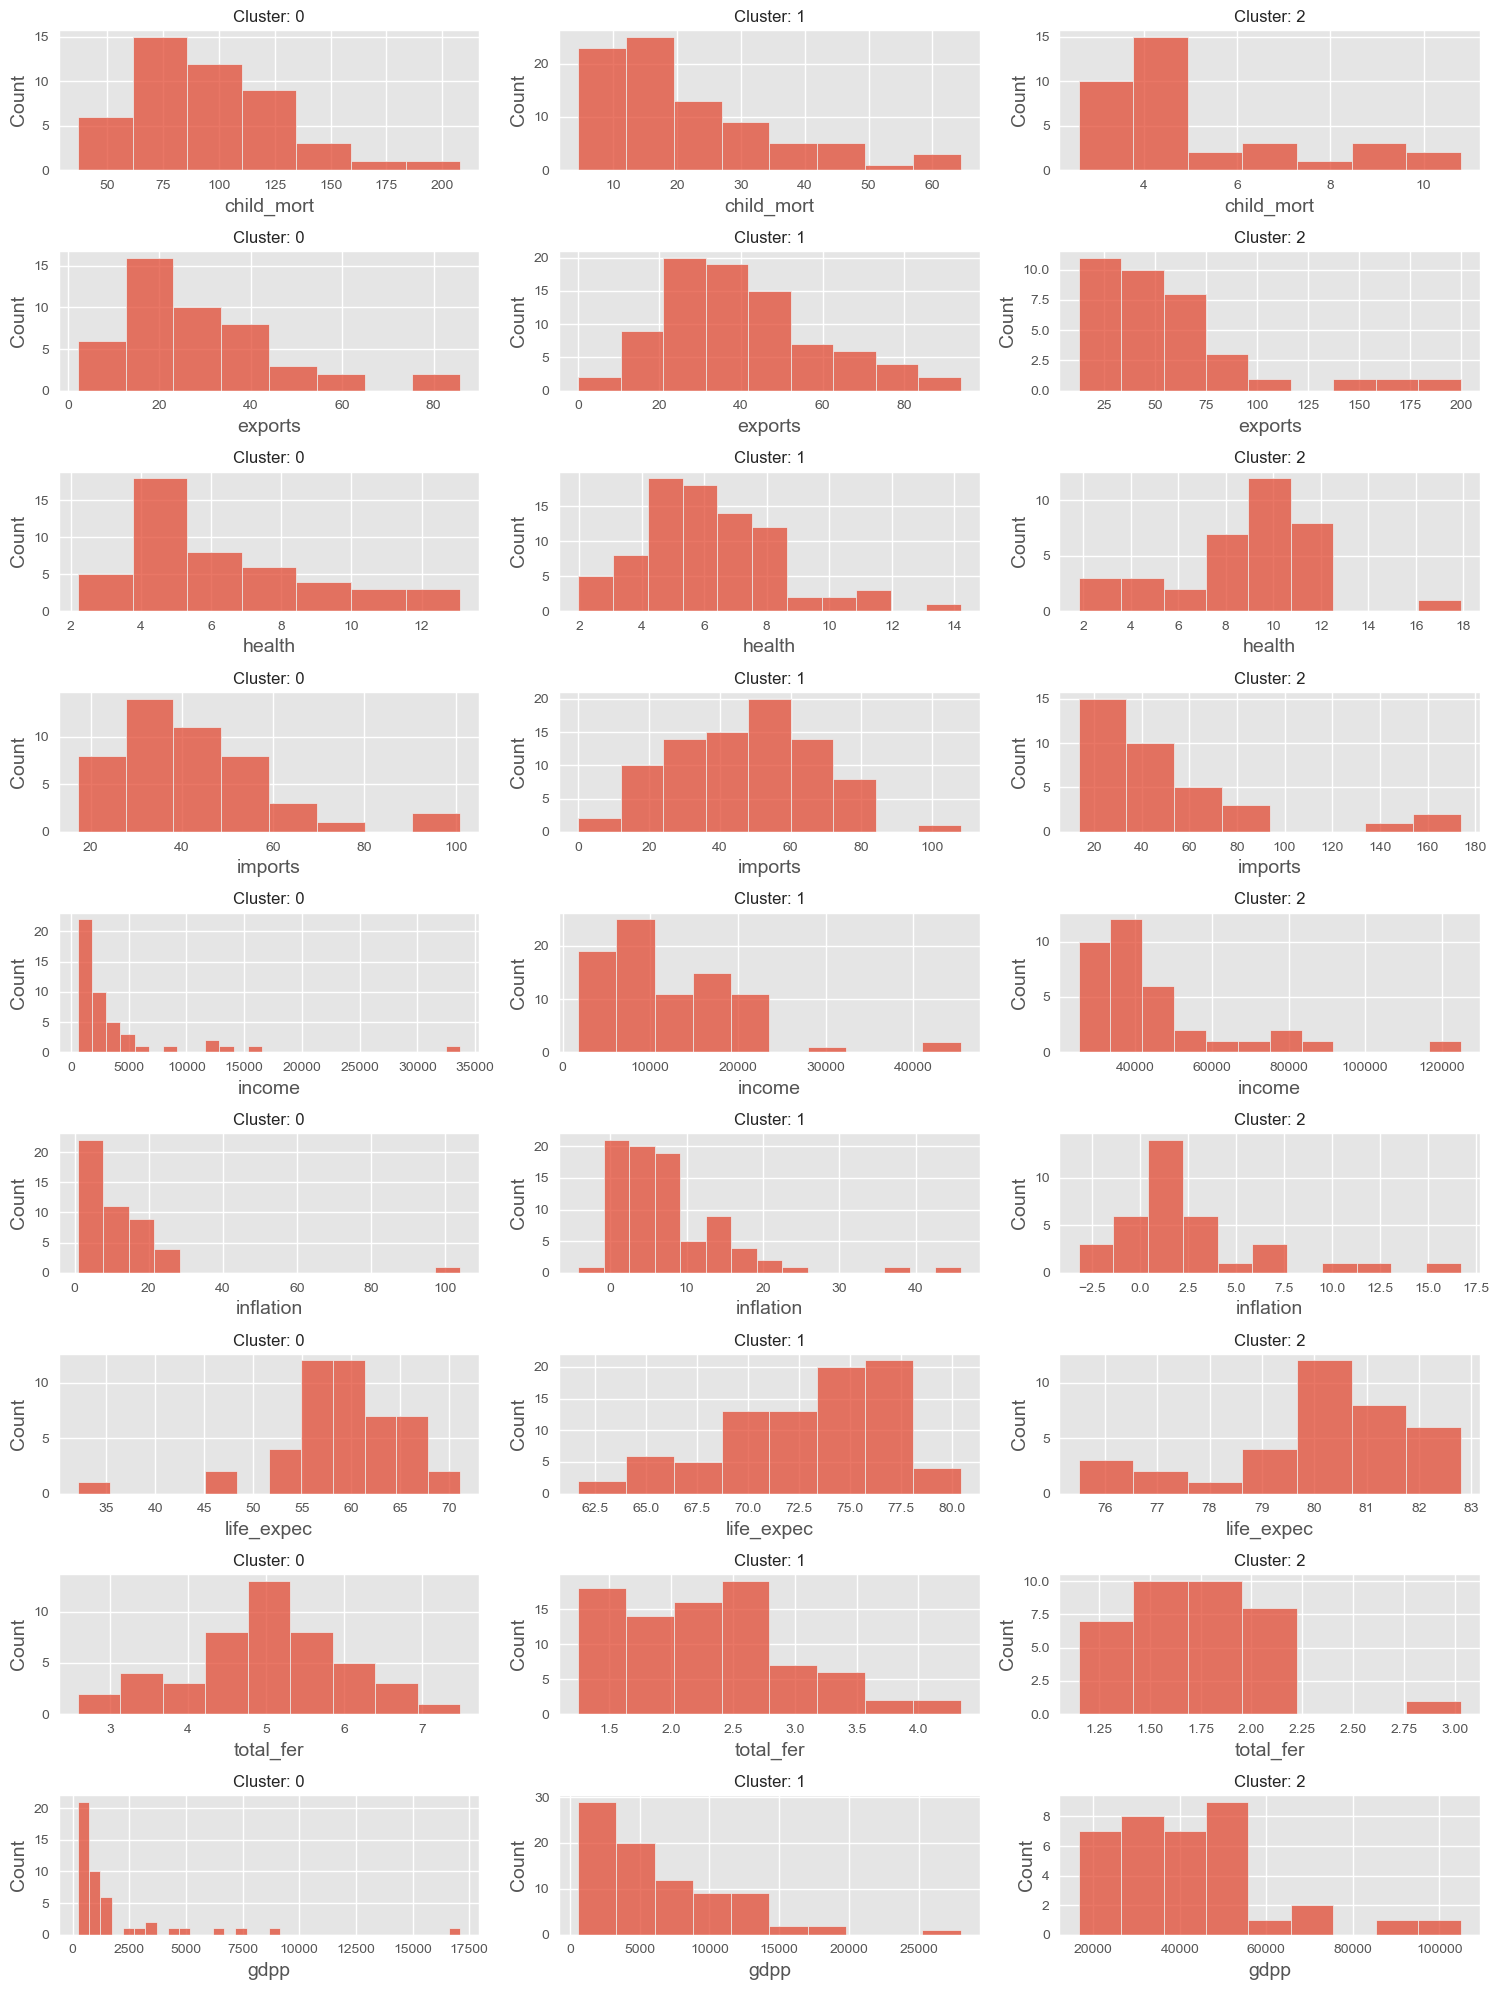

In [47]:
# plot descriptive histograms

kmeans_ppa_df_hist = kmeans_df.copy()

kmeans_ppa_df_hist_columns = list(kmeans_ppa_df_hist.columns[1:-1]) # get list of columns apart from cluster

fig, axes = plt.subplots(9, 3, figsize=(15, 20)) # nrows = clusters, ncols = cols

for col in kmeans_ppa_df_hist_columns:
    ix = kmeans_ppa_df_hist_columns.index(col)
    for cluster in range (0,3):
        plot_df = kmeans_ppa_df_hist[col][kmeans_ppa_df_hist['Cluster']==cluster]
        ax = axes[ix, cluster] # row = col , col = cluster
        ax.set_title('Cluster: ' + str(cluster), fontsize=12)
        ax.set_xlabel(col, fontsize = 14)
        ax.set_ylabel('Count', fontsize = 14)
        sns.histplot(x = plot_df, ax=ax)

fig.tight_layout()

plt.show()

##### Final cluster names
Based on above findings (GDPP, Child Mortality, Income, Health), clusters can be named as follows:
    
* Cluster 0: Underdeveloped -> 1st Priority for Funding
* Cluster 1: Developing -> 2st Priority for Funding
* Cluster 2: Developed -> No need for Funding


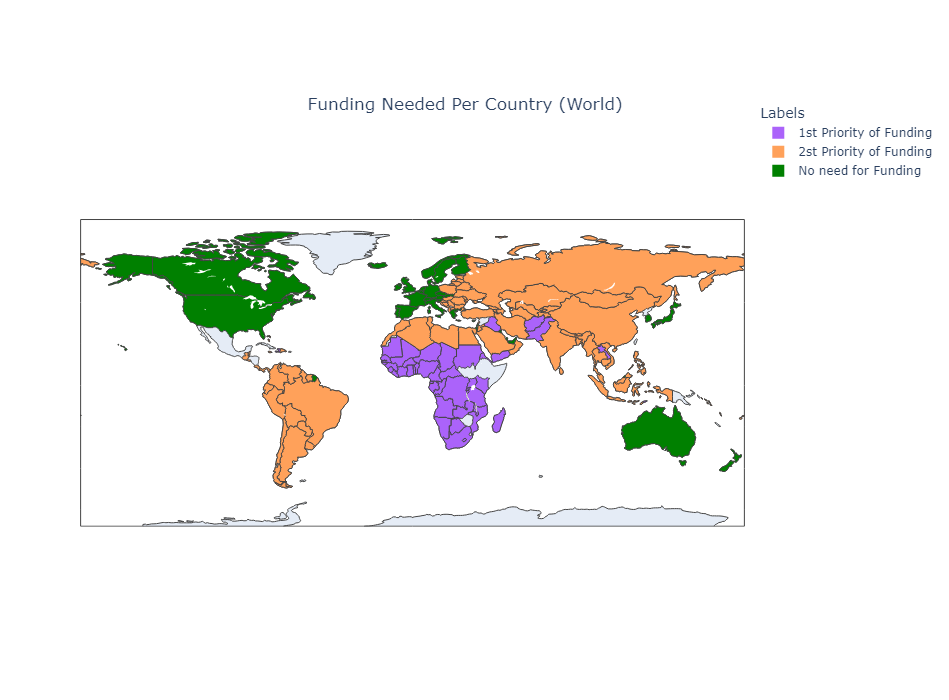

In [92]:
kmeans_df['Cluster'].loc[kmeans_df['Cluster'] == 0] = '1st Priority for Funding'
kmeans_df['Cluster'].loc[kmeans_df['Cluster'] == 1] = '2st Priority for Funding'
kmeans_df['Cluster'].loc[kmeans_df['Cluster'] == 2] = 'No need for Funding'

fig = px.choropleth(kmeans_df[['country','Cluster']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Funding Needed Per Country (World)',
                    color = kmeans_df['Cluster'],  
                    color_discrete_map = {'1st Priority for Funding' : 'Red',
                                          '2st Priority for Funding' : 'Yellow',
                                          'No need for Funding' : 'Green'})
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86,
                 height=700,
                 width=900)
fig.show(engine = 'kaleido')

In [82]:
kmeans_df[kmeans_df['Cluster'] == '1st Priority of Funding'].sort_values('child_mort', ascending=False).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,1st Priority of Funding
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399,1st Priority of Funding
32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897,1st Priority of Funding
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446,1st Priority of Funding
97,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708,1st Priority of Funding


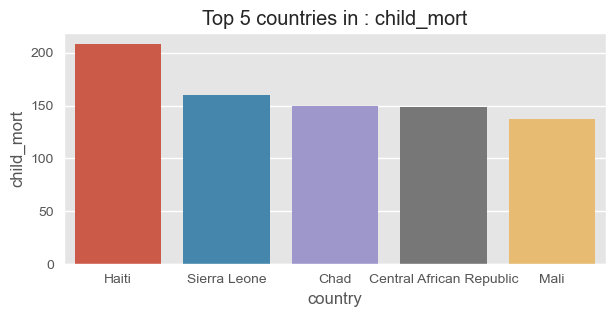

In [84]:
plt.figure(figsize = (7,3))
plt.title('Top 5 countries in : child_mort')
sns.barplot(data=kmeans_df[kmeans_df['Cluster'] == '1st Priority of Funding'].sort_values('child_mort', ascending=False).head(5), x="country", y='child_mort');

#### Hierarchical clustering

##### Scipy linkage()

In [59]:
'''generate the linkage matrix'''
Z = linkage(X, 'complete') # complete distance produces more meaningfull clusters in this case

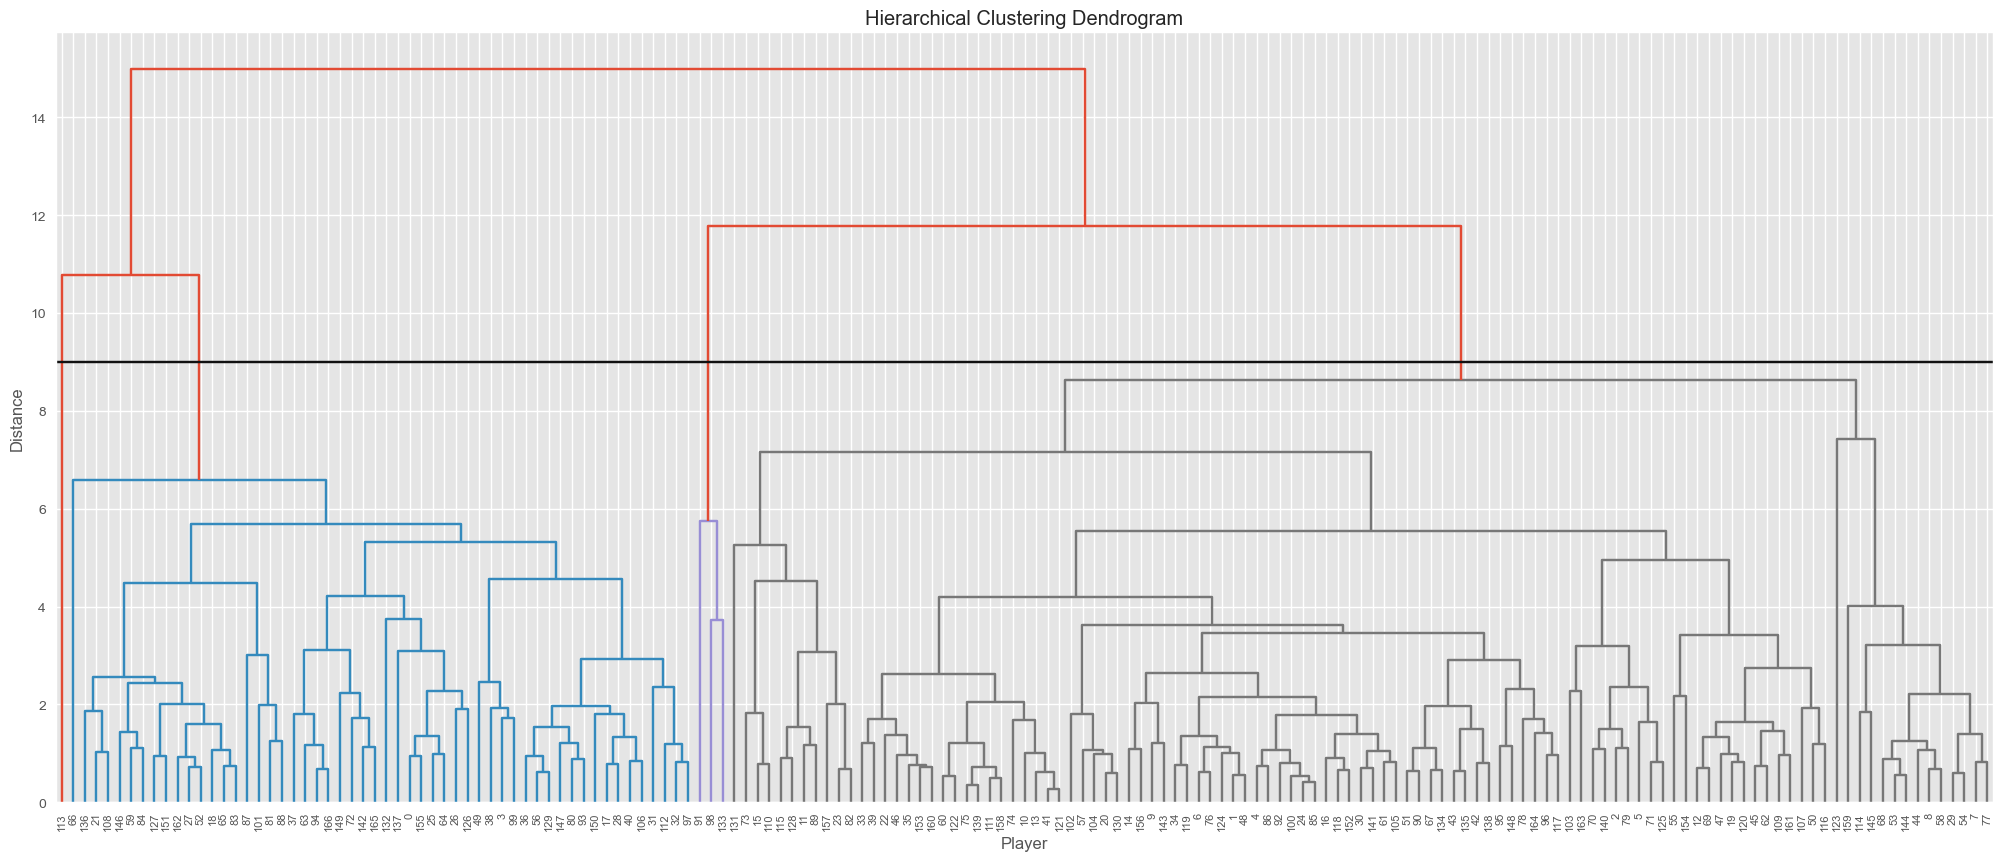

In [64]:
'''set cut-off'''
max_d = 9

'''plot the dendogram'''
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Player')
plt.ylabel('Distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=300,                  # Try changing values of p
    leaf_rotation=90.,      # rotates the x axis labels
    leaf_font_size=8.,      # font size for the x axis labels
    color_threshold = max_d
)
plt.axhline(y=max_d, c='k')
plt.show()

##### Sklearn agglomerative()

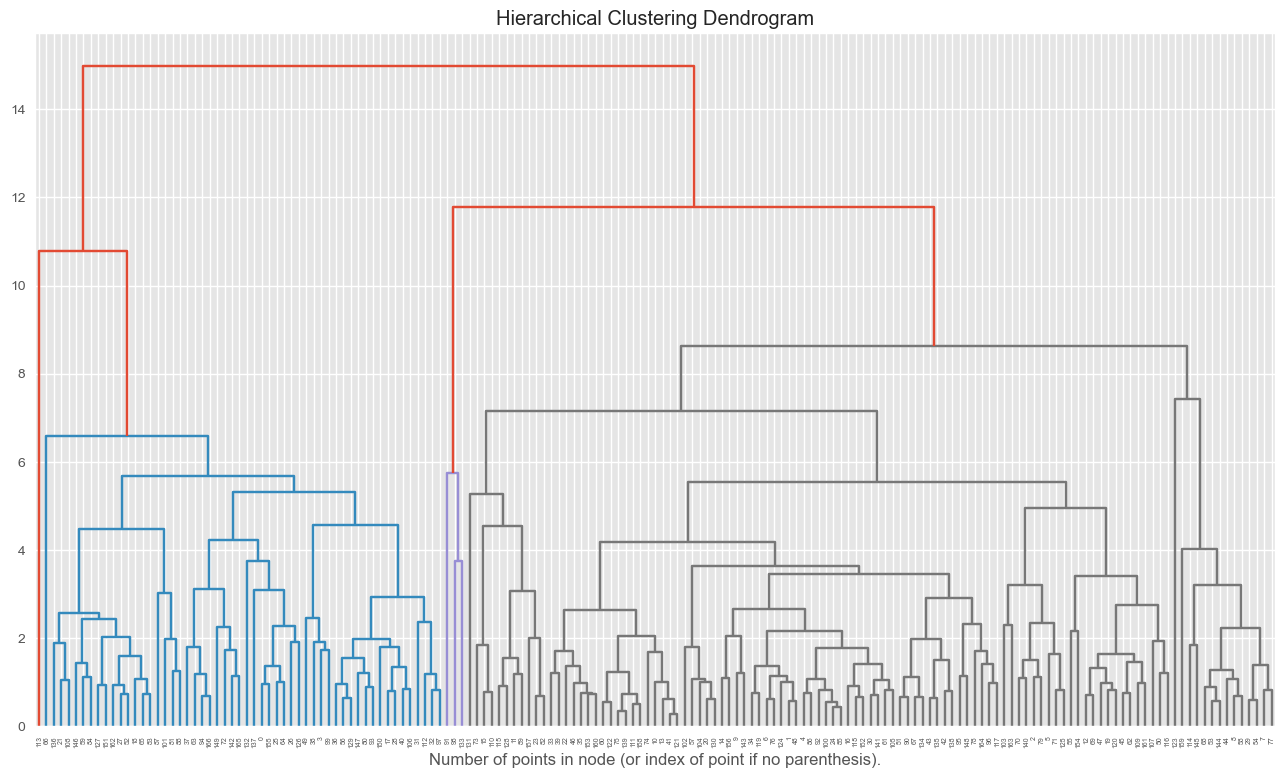

In [65]:
# Create Dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='complete')

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=100)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

##### Best model n=3

In [66]:
'''agglomerative cluster data with n=3'''
cluster = AgglomerativeClustering(n_clusters=3, linkage='complete')  
cluster.fit_predict(X)

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0], dtype=int64)

In [67]:
'''print clustering result'''
print(cluster.labels_)

[0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 0 0 1 1 0 0 1 1 1 0
 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 1 2 1 0 0 1 1 0 2 0 1 0 1 1 1 1 0 1 0 1 1
 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 2 1 1 0 0 1 1 1 1 0 1 1 1 0 0
 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0]


In [68]:
'''attribute clusters to players'''
y_hier = cluster.labels_
y_hier_df = pd.DataFrame(y_hier)
y_hier_df.rename({0: 'cluster'}, axis=1, inplace=True)
y_hier_df

,cluster
0,0
1,1
2,1
3,0
4,1
...,...
162,0
163,1
164,1
165,0


In [70]:
'''link player db with y data'''
hiercluster_df = pd.concat([df_original, y_hier_df], axis=1)
hiercluster_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


In [72]:
hiercluster_df['cluster'].unique()

array([0, 1, 2], dtype=int64)

In [73]:
hiercluster_df['cluster'].value_counts()

1    109
0     55
2      3
Name: cluster, dtype: int64

In [74]:
list(hiercluster_df.columns[1:-1])

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

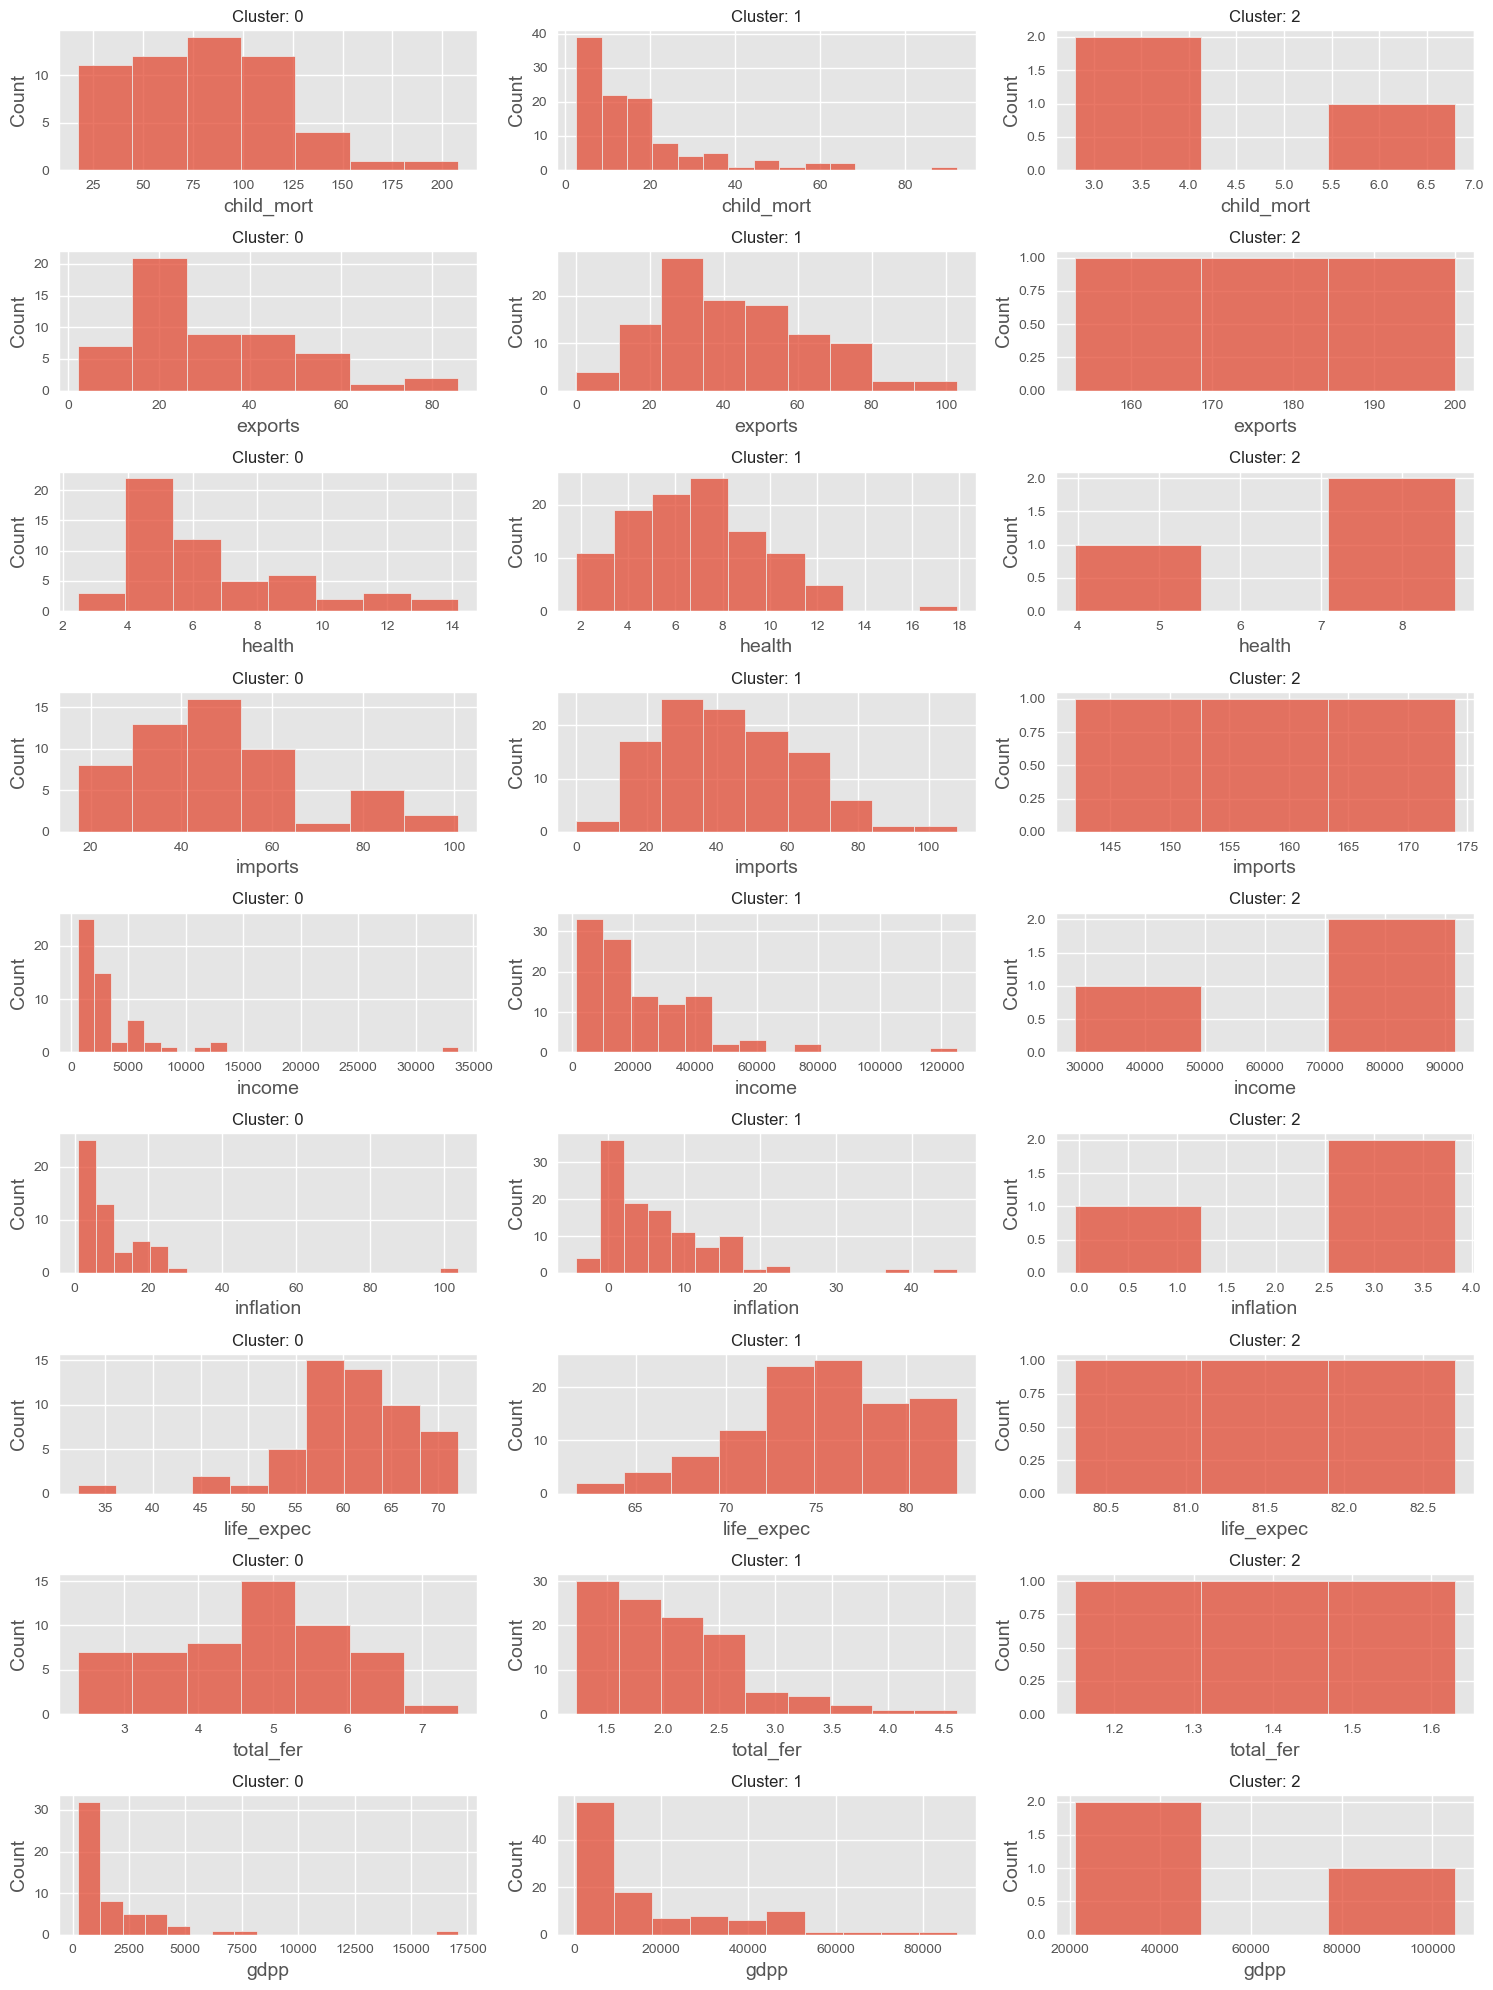

In [76]:
# plot descriptive histograms

hiercluster_df_hist = hiercluster_df.copy()

hiercluster_df_hist_columns = list(hiercluster_df_hist.columns[1:-1]) # get list of columns apart from cluster

fig, axes = plt.subplots(9, 3, figsize=(15, 20)) # nrows = clusters, ncols = cols

for col in hiercluster_df_hist_columns:
    ix = hiercluster_df_hist_columns.index(col)
    for cluster in range (0,3):
        plot_df = hiercluster_df_hist[col][hiercluster_df_hist['cluster']==cluster]
        ax = axes[ix, cluster] # row = col , col = cluster
        ax.set_title('Cluster: ' + str(cluster), fontsize=12)
        ax.set_xlabel(col, fontsize = 14)
        ax.set_ylabel('Count', fontsize = 14)
        sns.histplot(x = plot_df, ax=ax)

fig.tight_layout()

plt.show()

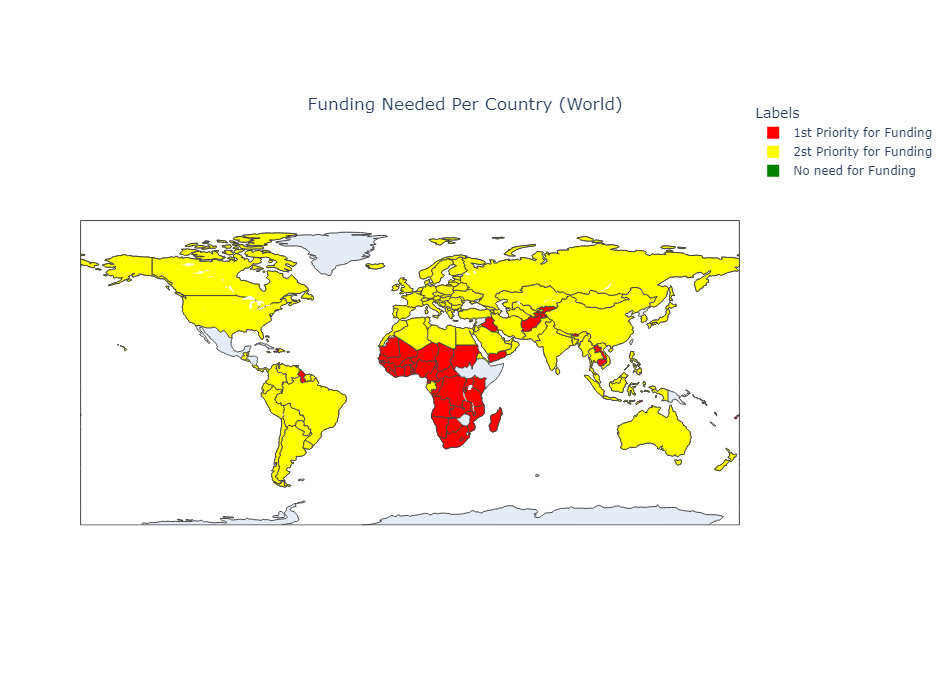

In [78]:
hiercluster_df['cluster'].loc[hiercluster_df['cluster'] == 0] = '1st Priority for Funding'
hiercluster_df['cluster'].loc[hiercluster_df['cluster'] == 1] = '2st Priority for Funding'
hiercluster_df['cluster'].loc[hiercluster_df['cluster'] == 2] = 'No need for Funding'

fig = px.choropleth(hiercluster_df[['country','cluster']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Funding Needed Per Country (World)',
                    color = hiercluster_df['cluster'],  
                    color_discrete_map = {'1st Priority for Funding' : 'Red',
                                          '2st Priority for Funding' : 'Yellow',
                                          'No need for Funding' : 'Green'})
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86,
                 height=700,
                 width=900)
fig.show(engine = 'kaleido')